# Tutorial on using the Platform

This is the tutorial bla bla bla

## Initialization

First we need to import the necessary class blabla bla

In [1]:
from qEmQUIP import QEM, conf
import sys, glob, os
from commons import convert_to_json, triq_optimization, qiskit_optimization, \
    calibration_type_enum, qiskit_compilation_enum, normalize_counts, calculate_success_rate_tvd, convert_dict_binary_to_int, convert_dict_int_to_binary
import wrappers.qiskit_wrapper as qiskit_wrapper
from wrappers.qiskit_wrapper import QiskitCircuit
import pandas as pd
import mthree
import mapomatic as mm
import mthree
from qiskit_aer import AerSimulator, QasmSimulator, Aer
from qiskit.qasm2 import dumps
import matplotlib.pyplot as plt

CB_color_cycle = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#D62728', '#FF9896',
                  '#9467BD', '#C5B0D5', '#8C564B', '#C49C94', '#E377C2', '#F7B6D2', '#7F7F7F', '#C7C7C7',
                  '#BCBD22', '#DBDB8D', '#17BECF', '#9EDAE5'
                  ]

markers = ['o', 'v', '^', 's', '+', '*', 'x', 'd', '<', '>', 'p']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':']



Here we need to initialize the object, please check the `config.ini` file to update the general config

In [2]:
# Put your Qiskit Token
token = "74076e69ed0d571c8e0ff8c0b2c912c28681d47426cf16a5d817825de16f7dbd95bf6ff7c604b706803b78b2e21d1dd5cacf9f1b0aa81d672d938bded8049a17"
q = QEM(runs=conf.runs, user_id=conf.user_id, token=token)

Time for setup the backends: 10.126574677999997 seconds


In [3]:
# prepare the circuit
conf.base_folder = "./circuits/testing/"
qasm_files = q.get_qasm_files_from_path()

shots = 10000

# select compilation techniques
compilations = ["qiskit_0", "qiskit_3", "triq_lcd_sabre"]
# compilations = ["qiskit_0", "qiskit_3"]

# select the noise levels (0 = noiseless, 1 = noise model from real backend)
# noise_levels = [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
noise_levels = [0.6, 0.8, 1.0]

In [4]:
# q.send_to_real_backend(qasm_files, compilations)

In [6]:
df = q.run_simulator(qasm_files, compilations, noise_levels, shots, send_to_db=True)
df

Time for running the init header: 0.0006562700000358745 seconds
Total send to local simulator : 4
Running to Local Simulator with batch id: 4 ... 
Sent!
Running to Local Simulator with batch id: 5 ... 
Sent!
Running to Local Simulator with batch id: 6 ... 
Sent!
Running to Local Simulator with batch id: 7 ... 
Sent!
Time for sending to local simulator: 0.007956589000059466 seconds


,circuit_name,compilation,noise_level,success_rate
0,bv_6,qiskit_0,0.6,0.7700
1,bv_6,qiskit_3,0.6,0.8314
2,bv_6,triq_lcd_sabre,0.6,0.9183
3,bv_6,qiskit_0,0.8,0.8717
4,bv_6,qiskit_3,0.8,0.6998
5,bv_6,triq_lcd_sabre,0.8,0.9011
6,bv_6,qiskit_0,1.0,0.7118
7,bv_6,qiskit_3,1.0,0.7226
8,bv_6,triq_lcd_sabre,1.0,0.8753


To update the fake backend calibration data

In [3]:
# q.update_hardware_configs()

In [4]:
# qiskit_wrapper.generate_new_props(q.backend, "avg")
# qiskit_wrapper.generate_new_props(q.backend, "mix")
# qiskit_wrapper.generate_new_props(q.backend, "recent_15_adjust")

## Prepare the circuits

You can get the quantum circuit from a folder contains the qasm files or qasm string

In [8]:
# The path is coming from the config file, but you can also modify it here
conf.base_folder = "./circuits/testing/"
qasm_files = q.get_qasm_files_from_path()
print(qasm_files)

['./circuits/testing/bv_6.qasm']


Get the circuits from file

In [9]:
qc = q.get_circuit_properties(qasm_source=qasm_files[0])
qc.circuit.draw(idle_wires=False)

┌─────────────┐                    ┌─────────────┐               ┌─┐»
q_0: ┤ U3(π/2,0,π) ├─────────────────■──┤ U3(π/2,0,π) ├───────────────┤M├»
     ├─────────────┤                 │  └─────────────┘┌─────────────┐└╥┘»
q_1: ┤ U3(π/2,0,π) ├─────────────────┼─────────■───────┤ U3(π/2,0,π) ├─╫─»
     ├─────────────┤                 │         │       └─────────────┘ ║ »
q_2: ┤ U3(π/2,0,π) ├─────────────────┼─────────┼──────────────■────────╫─»
     ├─────────────┤                 │         │              │        ║ »
q_3: ┤ U3(π/2,0,π) ├─────────────────┼─────────┼──────────────┼────────╫─»
     ├─────────────┤                 │         │              │        ║ »
q_4: ┤ U3(π/2,0,π) ├─────────────────┼─────────┼──────────────┼────────╫─»
     └┬───────────┬┘┌─────────────┐┌─┴─┐     ┌─┴─┐          ┌─┴─┐      ║ »
q_5: ─┤ U3(π,0,π) ├─┤ U3(π/2,0,π) ├┤ X ├─────┤ X ├──────────┤ X ├──────╫─»
      └───────────┘ └─────────────┘└───┘     └───┘          └───┘      ║ »
c: 6/══════════════════════════════════════════════════════════════════╩═»
                                                                       0 »
«                                                                 
«q_0: ────────────────────────────────────────────────────────────
«                    ┌─┐                                          
«q_1: ───────────────┤M├──────────────────────────────────────────
«     ┌─────────────┐└╥┘               ┌─┐                        
«q_2: ┤ U3(π/2,0,π) ├─╫────────────────┤M├────────────────────────
«     └─────────────┘ ║ ┌─────────────┐└╥┘               ┌─┐      
«q_3: ───────■────────╫─┤ U3(π/2,0,π) ├─╫────────────────┤M├──────
«            │        ║ └─────────────┘ ║ ┌─────────────┐└╥┘┌─┐   
«q_4: ───────┼────────╫────────■────────╫─┤ U3(π/2,0,π) ├─╫─┤M├───
«          ┌─┴─┐      ║      ┌─┴─┐      ║ ├─────────────┤ ║ └╥┘┌─┐
«q_5: ─────┤ X ├──────╫──────┤ X ├──────╫─┤ U3(π/2,0,π) ├─╫──╫─┤M├
«          └───┘      ║      └───┘      ║ └─────────────┘ ║  ║ └╥┘
«c: 6/════════════════╩═════════════════╩═════════════════╩══╩══╩═
«                     1                 2                 3  4  5

Or you can also get it from the qasm strings

In [10]:
qasm_text = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0], q[1];
barrier q[0], q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
"""

qc = q.get_circuit_properties(qasm_source=qasm_text)
qc.circuit.draw(idle_wires=False)

┌─────────────┐      ░ ┌─┐   
q_0: ┤ U3(π/2,0,π) ├──■───░─┤M├───
     └─────────────┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ───────────────┤ X ├─░──╫─┤M├
                    └───┘ ░  ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1

`q.get_circuit_properties` will give an object of `QiskitCircuit` which will give the information of the circuits: 
- `circuit`: `QuantumCircuit` object from Qiskit
- `depth`: circuit depth
- `gates`: number of gates used in the circuit
- `total_gates`: number of total gates used in the circuit
- `correct_output`: noiseless output from the simulation
- `qasm`: OpenQASM2 file from the circuit translated to `U3` and `cx` gates
- `qasm_original`: OpenQASM2 file from the circuit original


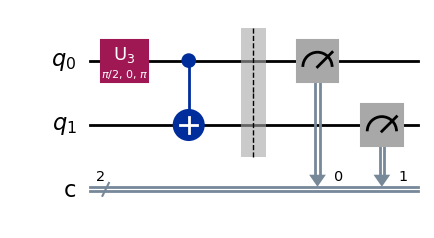

In [11]:
qc.circuit.draw("mpl")

In [12]:
print("Number of depth:", qc.depth)
print("Number of gates:", qc.gates)
print("Number of total gates:", qc.total_gate) 
print("Noiseless simulation output:", qc.correct_output)
print("Circuit Qasm:", qc.qasm)

Number of depth: 3
Number of gates: {'measure': 2, 'u3': 1, 'cx': 1, 'barrier': 1}
Number of total gates: 3
Noiseless simulation output: {'3': 0.4963, '0': 0.5037}
Circuit Qasm: OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u3(pi/2,0,pi) q[0];
cx q[0],q[1];
barrier q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];


## Compilation Techniques

### Qiskit

We integrated several compilation techniques from Qiskit

In [13]:
print("Existing Qiskit Compilation Options:")
for member in qiskit_compilation_enum:
    print(member.name)

Existing Qiskit Compilation Options:
qiskit_0
qiskit_3
qiskit_NA_avg
qiskit_NA_lcd
qiskit_NA_mix
qiskit_NA_w15
qiskit_NA_avg_adj
qiskit_NA_lcd_adj
qiskit_NA_mix_adj
qiskit_NA_w15_adj
qiskit_NA_wn
qiskit_NA_wn_adj
mapomatic_lcd
mapomatic_avg
mapomatic_mix
mapomatic_avg_adj
mapomatic_w15_adj


In [14]:
updated_qasm, initial_mapping = q.compile(qasm=qc.qasm_original, compilation_name=qiskit_compilation_enum.qiskit_3.value)
print(updated_qasm)
print(initial_mapping)

OPENQASM 2.0;
include "qelib1.inc";
gate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(param0) q1; cx q0,q1; h q1; }
gate ecr q0,q1 { rzx(pi/4) q0,q1; x q0; rzx(-pi/4) q0,q1; }
qreg q[127];
creg c[2];
rz(-pi) q[58];
sx q[58];
rz(-pi) q[58];
rz(pi/2) q[59];
sx q[59];
ecr q[59],q[58];
x q[59];
barrier q[59],q[58];
measure q[59] -> c[0];
measure q[58] -> c[1];
[59, 58]


### TriQ

Also, we integrate TriQ Compilation with different options.

Qubit placement options:
- `na`: initial mapping from Noise-adaptive technique []
- `mapo`: initial mapping from Mapomatic technique []
- `sabre`: initial mapping from SABRE []

Calibration type options:
- `lcd` : TriQ's routing with last calibration data.
- `avg` : TriQ's routing with average calibration data.
- `mix` : TriQ's routing with mix calibration data. (Mix = if the qubits calibrated today, we will use the last calibration data for that qubit, otherwise we will use the average)
- `w15` : TriQ's routing with average calibration data of 15 days from the qubit is compiled.

The combinations of name become: `triq_<calibration_type>_<layout>`. For examples:
- `triq_avg_na`
- `triq_mix_sabre`

**Note: From Qiskit version > 1.0.0, `noise_adaptive` layout has been removed**

In [15]:
updated_qasm, initial_mapping = q.compile(qasm=qc.qasm_original, compilation_name="triq_avg_sabre")
print(updated_qasm)

['/Users/handy/Github/quantum_platform/wrappers/triq_wrapper/triq', './output.in', './output.qasm', 'ibm_sherbrooke_avg', '0', './init_mapo.map', 'normal']


FileNotFoundError: [Errno 2] No such file or directory: '/Users/handy/Github/quantum_platform/wrappers/triq_wrapper/triq'

## Initiate Noisy simulator

To play around with the noise, we can get retrieve the last recorded calibration data from IBM's backend, and scale down the error


In [13]:
noise_model, noisy_simulator, coupling_map = qiskit_wrapper.get_noisy_simulator(q.backend, 1)

## Running the compiled circuit to the simulator

First, we need to transpile the circuit to the targeted backend

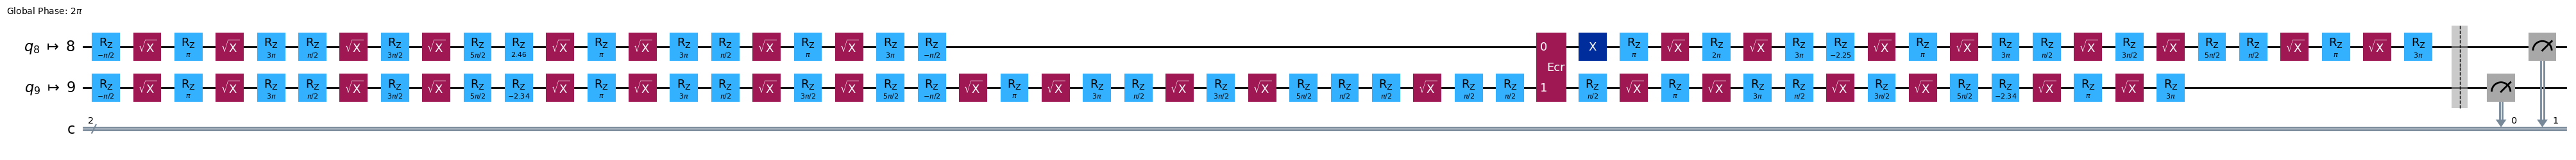

In [14]:
qc = QiskitCircuit(updated_qasm)
circuit = qc.transpile_to_target_backend(q.backend, False)
circuit.draw("mpl", idle_wires=False, fold=60)

In [15]:
shots = 10000
job = noisy_simulator.run(circuit, shots=shots)
result = job.result()  
output = result.get_counts()
output_normalize = normalize_counts(output, shots=shots)
output

{'01': 488, '10': 374, '00': 4496, '11': 4642}

## Calculate the Fidelity

In [16]:
fidelity = calculate_success_rate_tvd(qc.correct_output,output_normalize)
fidelity

0.9138

## Error Mitigation (Mthree)

In [17]:
from qiskit_ibm_runtime import QiskitRuntimeService
qiskit_token = token

QiskitRuntimeService.save_account(channel="ibm_quantum", token=qiskit_token, overwrite=True)
service = QiskitRuntimeService(channel="ibm_quantum", token=qiskit_token)
backend_service = service.backend("ibm_sherbrooke")
backend_sim = AerSimulator.from_backend(backend_service)

In [18]:
#probs_m3 = q.apply_mthree(noisy_simulator, initial_mapping, output, shots)
probs_m3 = q.apply_mthree(backend_sim, initial_mapping, output, shots)
fidelity_m3 = calculate_success_rate_tvd(qc.correct_output, probs_m3)
overhead = (fidelity_m3 - fidelity) / fidelity_m3
print(fidelity, fidelity_m3, overhead)

0.9138 0.9842584323637936 0.07158529716080847


# Put all of them together

In [19]:
res_circuit_name = []
res_compilations = []
res_noise_levels = []
res_success_rate = []
res_success_rate_m3 = []

# prepare the circuit
conf.base_folder = "./circuits/testing/"
qasm_files = q.get_qasm_files_from_path()

shots = 10000

# select compilation techniques
#compilations = ["qiskit_0", "qiskit_3", "triq_lcd_sabre"]
compilations = ["qiskit_0", "qiskit_3"]

# select the noise levels (0 = noiseless, 1 = noise model from real backend)
# noise_levels = [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
noise_levels = [1.0]

for noise in noise_levels:
    
    noise_model, noisy_simulator, coupling_map = qiskit_wrapper.get_noisy_simulator(q.backend, noise)
    
    for qasm in qasm_files:
        qc = q.get_circuit_properties(qasm_source=qasm)

    
        for comp in compilations:    
            circuit_name = qasm.split("/")[-1].split(".")[0]
    
            updated_qasm, initial_mapping = q.compile(qasm=qc.qasm_original, compilation_name=comp)
            compiled_qc = QiskitCircuit(updated_qasm)
            circuit = compiled_qc.transpile_to_target_backend(q.backend, False)
            
            

            job = noisy_simulator.run(circuit, shots=shots)
            result = job.result()  
            output = result.get_counts()
            output_normalize = normalize_counts(output, shots=shots)

            tvd = calculate_success_rate_tvd(qc.correct_output,output_normalize)

            probs_m3 = q.apply_mthree(noisy_simulator, initial_mapping, output, shots)
            tvd_m3 = calculate_success_rate_tvd(qc.correct_output, probs_m3)
            
            print(circuit_name, "- compilation :", comp, ", noise level :", noise, ", success rate :", tvd, ", success rate m3:", tvd_m3)
            res_circuit_name.append(circuit_name)
            res_compilations.append(comp)
            res_noise_levels.append(noise)
            res_success_rate.append(tvd)
            res_success_rate_m3.append(tvd_m3)

        


bv_6 already exist.
qiskit_0
bv_6 - compilation : qiskit_0 , noise level : 1.0 , success rate : 0.4839 , success rate m3: 0.5388880324350636
bv_6 already exist.
qiskit_3
bv_6 - compilation : qiskit_3 , noise level : 1.0 , success rate : 0.6768 , success rate m3: 0.8615585891629446


Or just run the function 

In [20]:
df = q.run_simulator(qasm_files, compilations, noise_levels, 10000, "m3", True)
df

,circuit_name,compilation,noise_level,success_rate
0,bv_6,qiskit_0,1.0,0.506
1,bv_6,qiskit_3,1.0,0.097


## Plot the results

In [20]:
df = pd.DataFrame({
        'circuit_name': res_circuit_name,
        'compilation': res_compilations,
        'noise_level': res_noise_levels,
        'success_rate': res_success_rate,
    })

df_m3 = pd.DataFrame({
        'circuit_name': res_circuit_name,
        'compilation': res_compilations,
        'noise_level': res_noise_levels,
        'success_rate': res_success_rate_m3
    })

### Combined plot

In [21]:
def create_line_chart_combined(data, y, opt_values, metric, ax, type, ylabel, xlabel, yticks = None, 
                      y_bot = None, y_top = None, figsize = (12,8), c_idx = 0, reindex = None, x_index = "header_id", x_labels = [], i=0):
    tmp = ()
    
    for idx, opt in enumerate(opt_values):
        # print(idx, opt)
        idx_marker = idx + (len(opt_values) * i)
        # idx = idx 
        pivot = pd.pivot_table(data[data[y] == opt], 
                               values=[metric], 
                               index=x_index, 
                               columns=y, 
                               aggfunc='mean')    
        if reindex != 0:
            if reindex is None:
                if len(tmp) == 0:
                    tmp = pivot.index
                else:
                    pivot = pivot.reindex(tmp)
            else:
                pivot = pivot.reindex(reindex)

        idx_color = (idx % (len(markers)))
        # print(idx_color, idx, len(markers))

        # print (pivot)
         
        pivot.plot(kind='line', color=CB_color_cycle[idx], marker=markers[idx_marker], linestyle=linestyles[i], figsize=figsize, ax=ax)

        mean= pivot.mean().mean()

    if i == 1:
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        
    
        if yticks is not None:
            ax.set_yticks(yticks)
    
        if y_bot is not None and y_top is not None:
            ax.set_ylim(bottom= y_bot, top= y_top)
    
        if x_labels is not None:
            ax.set_xticks(np.arange(len(x_labels)))
            ax.set_xticklabels(x_labels)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
        ax.grid()


In [22]:
def show_figure_by_opt_combined(dfs, y, y_values, metric, ylabel, xlabel, legend = None, figsize=(10,6), reindex=None, 
                             x_index = "total_2q", x_labels = [], x_lim = [1, 100], 
                            y_lim = [0,1], title=None, legend_position=None, circuit_name = "", hw_name = ""):
    # y_values = noise_levels

    metrics = [metric]
    row = 1
    col = 1

    fig, ax = plt.subplots(nrows=row, ncols=1)

    yticks = None
    
    for i in range(2):
        # print(i)
        create_line_chart_combined(dfs[i], y, y_values, metrics[0], ax, "opt", ylabel, xlabel, yticks, figsize=figsize, reindex=reindex,
                          x_index = x_index, x_labels=x_labels, i=i)

    # n=[]        
    # n.append(ax.axhline(np.NaN, color="gray", linestyle='-.'))

    # l1 = ax.legend(n, ["Mean"], loc=[0.82, 0.49])

    if legend is None:
            l2 = plt.legend()
    else:
        if legend_position == None:
            l2 = plt.legend(legends)
        else:
            l2 = plt.legend(legends, loc = legend_position)
    
    # plt.tight_layout()
    # ax.add_artist(l1)
    plt.xlim(x_lim) 
    plt.ylim(y_lim)
    plt.title(title)
    #plt.savefig("./output/{}_{}_{}.png".format(circuit_name, hw_name, x_index), dpi=500, bbox_inches='tight')
    plt.show()
    
    return plt

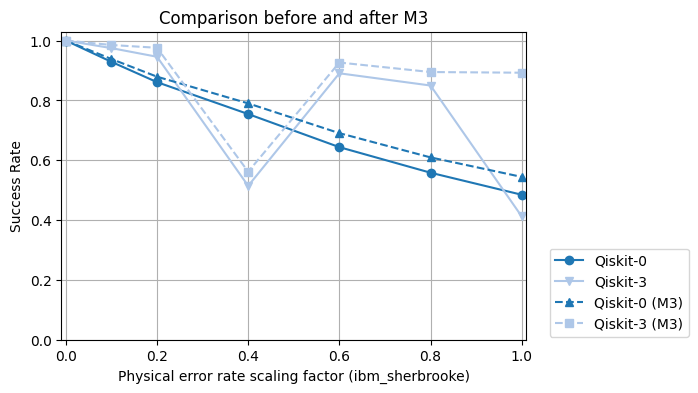

In [23]:
y_values = ['qiskit_0', 'qiskit_3']
legends  = ["Qiskit-0", "Qiskit-3",
            "Qiskit-0 (M3)", "Qiskit-3 (M3)" 
           ]
x_lim=[-0.01, 1.01]
y_lim=[0,1.03]
legend_position=(0.01,0.01)
circuit_name = "adder"
hw_name = "sherbrooke"
title="State preparation logical |+>"
x_index = "noise_level"

# print(y_values)
x_labels = None
dfs = [df, df_m3]

plt = show_figure_by_opt_combined(dfs, "compilation", y_values, "success_rate", "Success Rate", "Physical error rate scaling factor (ibm_sherbrooke)", legends, figsize=(6,4), 
                   reindex=None, x_index = "noise_level", x_labels=x_labels, x_lim=[-0.01, 1.01], y_lim=[0,1.03],legend_position=(1.05,0.01),
                       circuit_name = "polar_n2_x", hw_name = hw_name, title="Comparison before and after M3")

# Estimator

In [24]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

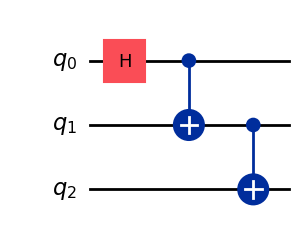

In [25]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.draw("mpl")

In [26]:
ZZ = SparsePauliOp('ZZZ')
ZI = SparsePauliOp('ZII')
IX = SparsePauliOp('IXI')
IZ = SparsePauliOp('IZI')
XI = SparsePauliOp('XII')
XX = SparsePauliOp('XXX')
observables = [IZ, IX, ZI, XI, ZZ, XX]

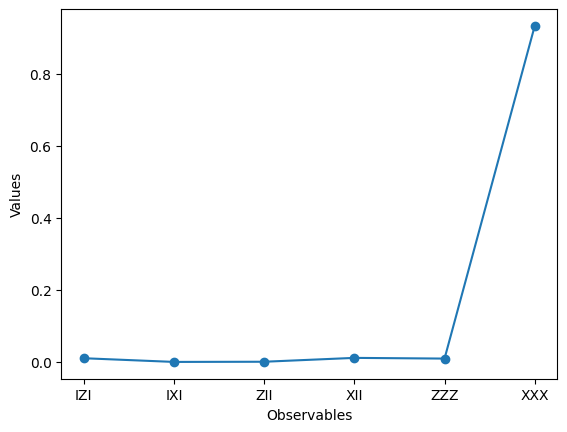

In [27]:
noise_model, noisy_simulator, coupling_map = qiskit_wrapper.get_noisy_simulator(q.backend, 1)
estimator = Estimator(mode=noisy_simulator)
pub = (qc, observables)
job = estimator.run(pubs=[pub])
# Collect the data
data = ['IZI', 'IXI', 'ZII', 'XII', 'ZZZ', 'XXX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

In [28]:
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
from qiskit.circuit.library import EfficientSU2

pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


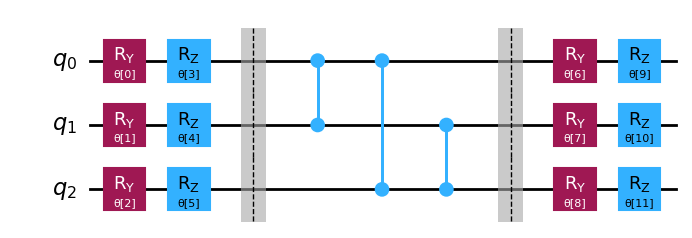

In [29]:
num_qubits = 3 #Add your code here
rotation_blocks = ["ry","rz"] #Add your code here
entanglement_blocks = "cz" #Add your code here
entanglement = "full" #Add your code here

ansatz = TwoLocal(num_qubits, ['ry','rz'], 'cz', 'full', reps=1, insert_barriers=True) #Add your code here

### Don't change any code past this line ###
ansatz.decompose().draw('mpl')

In [30]:
num_params = ansatz.num_parameters
backend_answer = noisy_simulator #Add your code
optimization_level_answer = 3 #Add your code
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit = pm.run(ansatz) # Add your code
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

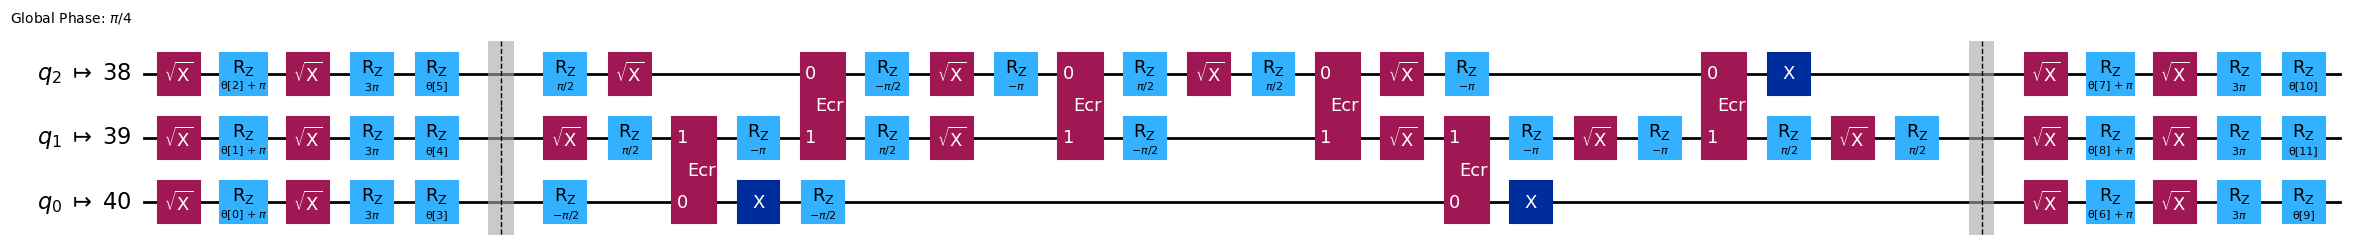

In [31]:
isa_circuit.draw('mpl', idle_wires=False, fold=50)

In [32]:
initial_mapping = qiskit_wrapper.get_initial_layout_from_circuit(isa_circuit)
initial_mapping

[40, 39, 38]

### Mthree

In [34]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

x0 = 2 * np.pi * np.random.random(num_params)
bound_circs = isa_circuit.assign_parameters(x0)
creg = ClassicalRegister(3, 'c')
bound_circs.add_register(creg)
bound_circs.measure(40, 0)
bound_circs.measure(39, 1)
bound_circs.measure(38, 2)
result = noisy_simulator.run(bound_circs, shots=10000).result()
counts = result.get_counts()

mit = mthree.M3Mitigation(noisy_simulator)
mit.cals_from_system(initial_mapping)

quasis = mit.apply_correction(counts, initial_mapping)

coeffs = []
meas_strings = []

for i in pauli_op.to_list():
    meas_string, coeff = i
    coeffs.append(coeff)
    meas_strings.append(meas_string)

print(meas_strings, coeffs)
print(np.sum(coeffs * quasis.expval(meas_strings)))


['ZII', 'IZI', 'IIZ'] [(1+0j), (1+0j), (1+0j)]
(-0.9775853576895642+0j)


## Classical Optimizer

In [ ]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params]) #Add your code
    result = estimator.run(pubs=[pub]).result() #Add your code
    energy = result[0].data.evs[0] #Add your code

    callback_dict["iters"] += 1 #Add your code
    callback_dict["prev_vector"] = params #Add your code
    callback_dict["cost_history"].append(energy) #Add your code


### Don't change any code past this line ###
    print(energy)
    return energy, result

In [ ]:
ansatz = EfficientSU2(3)
params = np.ones((1,ansatz.num_parameters))
aer_sim = noisy_simulator
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuits = pm.run(ansatz)
choc_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
hamiltonian_isa = choc_op.apply_layout(layout=isa_circuits.layout)
estimator = Estimator(mode=aer_sim)

callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": []
}
cost, result = cost_func(
    params,
    isa_circuits,
    hamiltonian_isa,
    estimator,
    callback_dict
)

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [ ]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

In [ ]:
# backend = FakeSherbrooke()
backend = noisy_simulator

# ### Don't change any code past this line ###

# Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(mode=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 10})

In [ ]:
fig, ax = plt.subplots()
plt.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
plt.xlabel("Energy")
plt.ylabel("Cost")
plt.draw()

## Error Mitigation

### Zero Noise Extrapolation (ZNE)

In [ ]:
import mysql.connector

mysql_config = {
    'user': 'handy',
    'password': 'handy',
    'host': 'localhost',
    'database': 'framework'
}

In [ ]:
conn = mysql.connector.connect(**mysql_config)
cursor = conn.cursor()